In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np

In [20]:
#importação dos dados
dataset_x = pd.read_csv('train_dataset.csv')

In [21]:
#Separacao do dataset em variavel dependente e independente
y_label = dataset_x['Y']
dataset_x = dataset_x.drop(columns = ['Y'])

In [22]:
#confirmação do dataset
print(dataset_x.shape)
print(y_label.shape)
dataset_x.head()

(17425, 10333)
(17425,)


,Genomic_0,Genomic_1,Genomic_2,Genomic_3,Genomic_4,Genomic_5,Genomic_6,Genomic_7,Genomic_8,Genomic_9,...,Morgan_1003_drug2,Morgan_1004_drug2,Morgan_1005_drug2,Morgan_1009_drug2,Morgan_1010_drug2,Morgan_1011_drug2,Morgan_1014_drug2,Morgan_1017_drug2,Morgan_1018_drug2,Morgan_1019_drug2
0,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.269788,5.034453,5.269788,0.90597,2.510154,5.269788,5.269788,-1.493994,1.140595,-0.89096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


PCA and t-SNE were used to reduce dimensionality. Initially, the number of components needed to explain 90% of the variance in the data was calculated. But why 90 per cent? As this is a problem associated with Drug Synergy, i.e. health-related, it is essential to ensure that most of the variance in the data is preserved in order to maintain the integrity and accuracy of the information. This is crucial to ensure that the analyses and conclusions derived from the data are reliable and can be used to make informed decisions in health contexts.

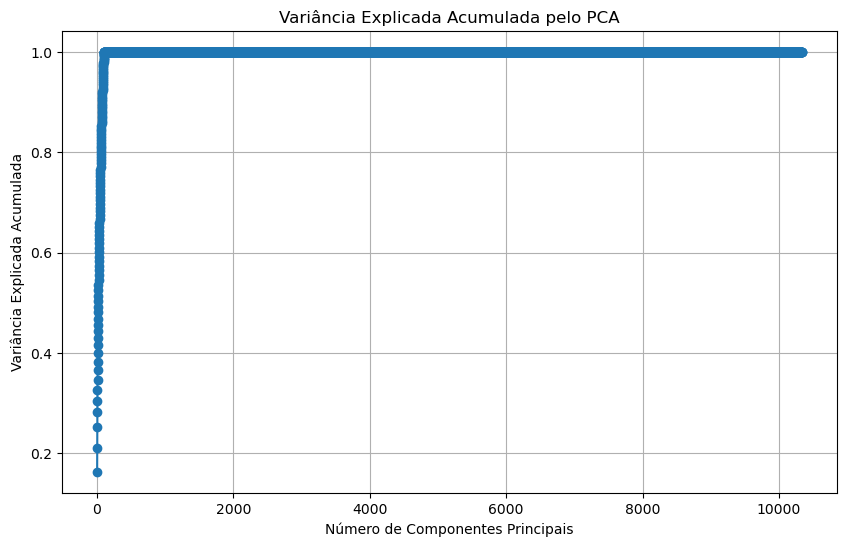

Número de componentes principais necessários para explicar 90% da variância: 75


In [9]:
pca = PCA().fit(dataset_x)

# Plotar a variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada pelo PCA')
plt.grid()
plt.show()

# Determinar o número de componentes necessários para explicar 90% da variância
n_components = next(i for i, cumulative_variance in enumerate(pca.explained_variance_ratio_.cumsum(), 1) if cumulative_variance >= 0.90)
print(f'Número de componentes principais necessários para explicar 90% da variância: {n_components}')

# Aplicar PCA com o número de componentes necessários
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(dataset_x)


In [10]:
# Aplicar PCA com 75 componentes principais
pca = PCA(n_components=75, random_state=42)
x_pca = pca.fit(dataset_x)

# Determinar a variância explicada acumulada
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print('Variância explicada: %s' % str(pca.explained_variance_ratio_))
print('Soma:', sum(pca.explained_variance_ratio_) * 100, '%')

Variância explicada: [0.16201251 0.04783072 0.04142193 0.03168551 0.02212862 0.02151037
 0.01960287 0.01919971 0.01721284 0.01699058 0.01530093 0.0148919
 0.01378247 0.01274779 0.01238464 0.01233741 0.0115966  0.01092333
 0.01075061 0.01044669 0.01028    0.01004023 0.00989647 0.00969254
 0.00946304 0.00912964 0.00895134 0.00886134 0.00873208 0.00858181
 0.00850318 0.0083598  0.00809726 0.00803113 0.00783849 0.00775079
 0.00772053 0.00753091 0.0074717  0.00742697 0.00738326 0.00710705
 0.00701879 0.00695326 0.00680308 0.00676868 0.00669988 0.00668976
 0.00650444 0.00644241 0.00630988 0.00619314 0.00615019 0.00605975
 0.00597983 0.00597158 0.00590118 0.00581316 0.00573955 0.00569605
 0.00563677 0.0056162  0.00553223 0.00540066 0.00529441 0.00526032
 0.00511658 0.00507877 0.0050112  0.0049427  0.00485427 0.00481678
 0.00473808 0.00468509 0.00463973]
Soma: 90.19259992965713 %


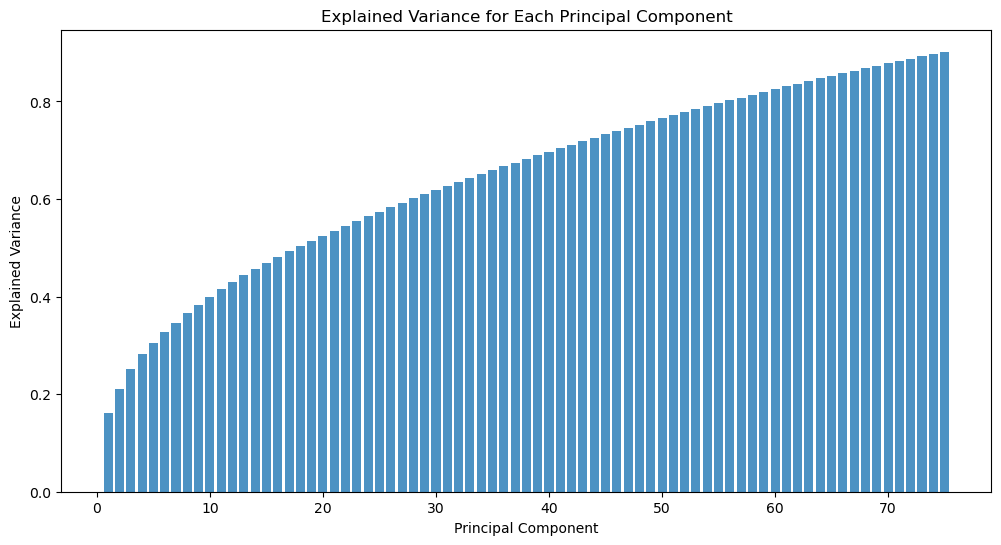

In [11]:
# gráfico de barras para os componentes principais
componentes = np.arange(1, 76)
plt.figure(figsize=(12, 6))
plt.bar(componentes, cumulative_variance_ratio, alpha=0.8, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Each Principal Component')
plt.show()

t-Distributed Stochastic Neighbour Embedding (t-SNE) is a dimensionality reduction technique that is particularly useful for visualising high-dimensional data. It preserves local structure, contributes to better visualisation and is highly robust to noise. These characteristics contribute to reducing the dimensionality of the data studied as well as its visualisation.

To make it easier to visualise these groupings, an operation was carried out to classify the data according to the value of Y. Y values were categorised according to articles associated with drugsynergy as follows:

Y values between -infinite and 0 were categorised as -1.

Y values between 0 and 30 were categorised as 0.

Y values between 30 and +infinite were categorised as 1.

In [24]:
# Criar a coluna 'Y_categories' usando a função apply e uma função lambda
dataset_x['Y_categories'] = y_label.apply(lambda y: 0 if 0 <= y < 30 else (1 if y >= 30 else -1))

# Verificar o resultado
dataset_x['Y_categories']

0        0
1        0
2       -1
3       -1
4        0
        ..
17420    0
17421    0
17422    0
17423    0
17424    0
Name: Y_categories, Length: 17425, dtype: int64

In [13]:
# t-SNE
from sklearn.manifold import TSNE

# create TSNE object
tsne_obj = TSNE(n_components=2, perplexity=30, random_state=42)
# fit TSNE
tsne_obj.fit(dataset_x)

TSNE(perplexity=30, random_state=42)

<Axes: >

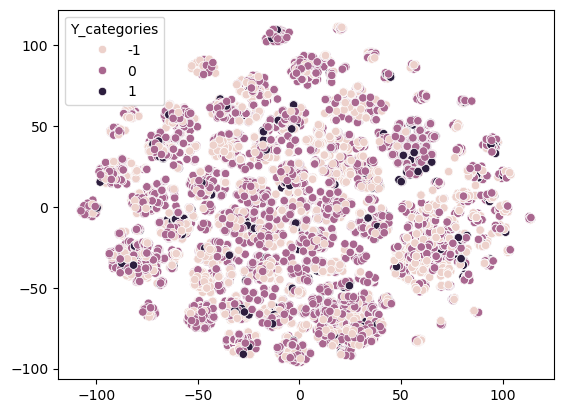

In [25]:
# plot TSNE
sns.scatterplot(x=tsne_obj.embedding_[:, 0], y=tsne_obj.embedding_[:, 1], hue=dataset_x['Y_categories'])

The t-SNE (t-Distributed Stochastic Neighbour Embedding) graph generated is a two-dimensional visualisation of the drug synergy data. Each blue dot on the graph represents a drug combination. The proximity between the dots indicates that these drug combinations have similar characteristics in high-dimensional space. Areas where the dots are more densely clustered suggest regions of high similarity, while more dispersed areas may indicate greater variability or outliers. t-SNE is designed to preserve the local structure of the data, making it easier to identify local patterns and relationships.

Initially, the Elbow Method was applied in order to define the ideal number of clusters to be used.

c:\Users\tsamu\anaconda3\envs\si_tp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tsamu\anaconda3\envs\si_tp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tsamu\anaconda3\envs\si_tp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tsamu\anaconda3\envs\si_tp\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

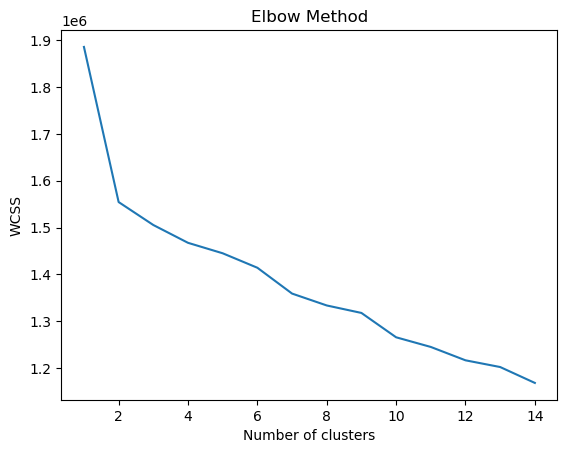

In [28]:
sampled_data = dataset_x.sample(n=200, random_state=42)

# Inicializar a lista WCSS
wcss = list()

# Calcular o WCSS para diferentes números de clusters
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(sampled_data)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

After analysing the graph above, we can see that the ideal number of clusters for this type of data is 2.

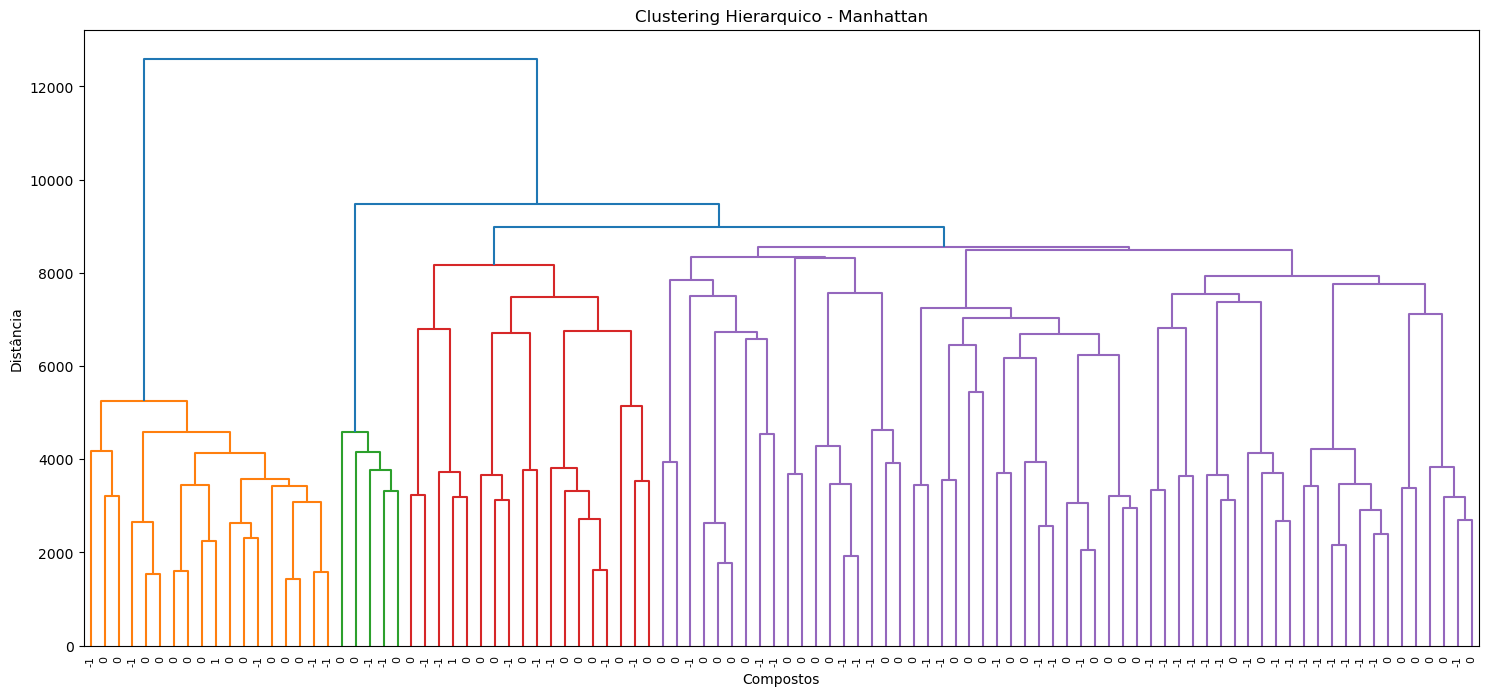

In [27]:
sampled_data = dataset_x.sample(n=100, random_state=42)

# Clustering hierarquico com distância de manhattan
Z = linkage(sampled_data, method='complete', metric='cityblock')

# dendograma
plt.figure(figsize=(18, 8))
dendrogram(Z,
           labels=sampled_data['Y_categories'].values,
           orientation='top',
           leaf_font_size=8)

# mapa de cores
data_colors = {-1:"red",0: 'blue', 1: 'green'}
ax = plt.gca()


plt.title('Clustering Hierarquico - Manhattan')
plt.xlabel('Compostos')
plt.ylabel('Distância')
plt.show()

In [ ]:
# eventualmente ver quais as features mais importantes para explicar a variância
# não foi retirada nenhuma conclusão geral significativa